In [1]:
#Importar las librerías necesarias
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from IPython.display import display_html
from scipy.stats import ttest_ind

In [2]:
#Leer las tablas originales
raw_costs = pd.read_csv('costs_us.csv')
raw_orders = pd.read_csv('orders_log_us.csv')
raw_visits = pd.read_csv('visits_log_us.csv')

In [3]:
#Crear función para primer vistazo de los datos
def first_lookup (dataframe):
    print('-----Dataframe information-----')
    display(dataframe.info())
    print('\n-----Statistics-----\n')
    display(dataframe.describe())
    print('\n-----Duplicates-----\n')
    print(dataframe.duplicated().sum())
    print('\n-----Empty values-----\n')
    print(dataframe.isna().sum())
    print('\n-----Head rows-----\n')
    display(dataframe.head(10))    

In [4]:
#Llamada a la función para primer vistazo de la tabla de costos
first_lookup(raw_costs)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None


-----Statistics-----



,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000



-----Duplicates-----

0

-----Empty values-----

source_id    0
dt           0
costs        0
dtype: int64

-----Head rows-----



,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [5]:
#Llamada a la función para primer vistazo de la tabla de órdenes
first_lookup(raw_orders)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None


-----Statistics-----



,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19



-----Duplicates-----

0

-----Empty values-----

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

-----Head rows-----



,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [6]:
#Llamada a la función para primer vistazo de la tabla de visitas
first_lookup(raw_visits)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None


-----Statistics-----



,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19



-----Duplicates-----

0

-----Empty values-----

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

-----Head rows-----



,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [7]:
#Crear copias de las tablas originales
clean_costs = raw_costs.copy()
clean_orders = raw_orders.copy()
clean_visits = raw_visits.copy()

In [8]:
#Limpieza de los nombres de las columnas de todas las tablas
clean_costs.columns = [columna.lower().replace(' ','_') for columna in clean_costs.columns]
clean_orders.columns = [columna.lower().replace(' ','_') for columna in clean_orders.columns]
clean_visits.columns = [columna.lower().replace(' ','_') for columna in clean_visits.columns]

In [9]:
#Canbio de tipo de datos a datetime para todas las columnas aplicables, en todas las tablas.
clean_costs['dt'] = pd.to_datetime(clean_costs['dt'])
clean_orders['buy_ts'] = pd.to_datetime(clean_orders['buy_ts'])
clean_visits['start_ts'] = pd.to_datetime(clean_visits['start_ts'])
clean_visits['end_ts'] = pd.to_datetime(clean_visits['end_ts'])

In [10]:
#Verificar tipo de datos de la tabla costos
print(clean_costs.head(10))
clean_costs.info()

   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08
5          1 2017-06-06  40.39
6          1 2017-06-07  40.59
7          1 2017-06-08  56.63
8          1 2017-06-09  40.16
9          1 2017-06-10  43.24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [11]:
#Verificar tipo de datos de la tabla órdenes
print(clean_orders.head(10))
clean_orders.info()

               buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450
5 2017-06-01 08:43:00     0.18  10402394430196413321
6 2017-06-01 08:54:00     1.83  12464626743129688638
7 2017-06-01 09:22:00     1.22   3644482766749211722
8 2017-06-01 09:22:00     3.30  17542070709969841479
9 2017-06-01 09:23:00     0.37   1074355127080856382
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
#Verificar tipo de datos de la tabla visitas
print(clean_visits.head(10))
clean_visits.info()
clean_visits2 = clean_visits.copy()

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9   1289240080042562063 

In [13]:
#Obtener la fecha de primera visita para cada usuario de la tabla visitas
first_visit = clean_visits.groupby('uid')['start_ts'].min()
# print(first_visit)
# print(clean_visits)

#Cambiar nombre de columna al resultado de la agrupación anterior
first_visit.name = 'first_visit_date'

#Unir la tabla anterior a la tabla de visitas original
clean_visits = clean_visits.join(first_visit,on='uid')

In [14]:
display(clean_visits)

,device,end_ts,source_id,start_ts,uid,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00
...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00


In [15]:
#Obtener columnas con año de visita
clean_visits['first_visit_year'] = clean_visits['first_visit_date'].dt.year
clean_visits['visit_year'] = clean_visits['start_ts'].dt.year
#Obtener columnas con mes de visita
clean_visits['first_visit_month'] = clean_visits['first_visit_date'].dt.month
clean_visits['visit_month'] = clean_visits['start_ts'].dt.month
#Obtener columnas con semana de visita
clean_visits['first_visit_week'] = clean_visits['first_visit_date'].dt.isocalendar().week
clean_visits['visit_week'] = clean_visits['start_ts'].dt.isocalendar().week
#Obtener columnas con día de visita
clean_visits['first_visit_day'] = clean_visits['first_visit_date'].dt.date
clean_visits['visit_day'] = clean_visits['start_ts'].dt.date
display(clean_visits.head(20))

,device,end_ts,source_id,start_ts,uid,first_visit_date,first_visit_year,visit_year,first_visit_month,visit_month,first_visit_week,visit_week,first_visit_day,visit_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017,2017,12,12,51,51,2017-12-20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018,2018,2,2,8,8,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017,2017,7,7,26,26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018,2018,3,5,10,20,2018-03-09,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017,2017,12,12,52,52,2017-12-27,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017,2017,9,9,35,35,2017-09-03,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2017-06-29 09:00:00,2017,2018,6,1,26,5,2017-06-29,2018-01-30
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05 15:14:00,2017,2017,11,11,44,44,2017-11-05,2017-11-05
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19 10:41:00,2017,2017,7,7,29,29,2017-07-19,2017-07-19
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08 13:42:00,2017,2017,11,11,45,45,2017-11-08,2017-11-08


# 1. VISITAS

## ¿Cuántas personas lo usan cada día, semana y mes?

In [16]:
#Agrupar tabla de visitas por día de visita y obtener la media de usuarios por día.
users_per_day = clean_visits.groupby('visit_day')['uid'].nunique().mean()

#Agrupar tabla de visitas por día de visita y obtener la media de usuarios por semana.
users_per_week_1 = clean_visits.groupby(['visit_year','visit_week'])['uid'].nunique().mean()

#Agrupar tabla de visitas por día de visita y obtener la media de usuarios por mes.
users_per_month_1 = clean_visits.groupby(['visit_year','visit_month'])['uid'].nunique().mean()

# users_per_month_2 = clean_visits.groupby('visit_month')['uid'].nunique().mean()
# users_per_week_2 = clean_visits.groupby('visit_week')['uid'].nunique()

print(f"Media de usuarios por día: {int(users_per_day)}")
print(f"Media de usuarios por semana: {int(users_per_week_1)}")
print(f"Media de usuarios por mes: {int(users_per_month_1)}")

Media de usuarios por día: 907
Media de usuarios por semana: 5716
Media de usuarios por mes: 23228


## ¿Cuántas sesiones hay por día?

n_sessions  n_users  sessions_per_user
visit_year visit_day                                         
2017       2017-06-01         664      605           1.097521
           2017-06-02         658      608           1.082237
           2017-06-03         477      445           1.071910
           2017-06-04         510      476           1.071429
           2017-06-05         893      820           1.089024
...                           ...      ...                ...
2018       2018-05-27         672      620           1.083871
           2018-05-28        1156     1039           1.112608
           2018-05-29        1035      948           1.091772
           2018-05-30        1410     1289           1.093871
           2018-05-31        2256     1997           1.129695

[364 rows x 3 columns]

Media de usuarios activos por día durante todo el período de análisis: 1.08


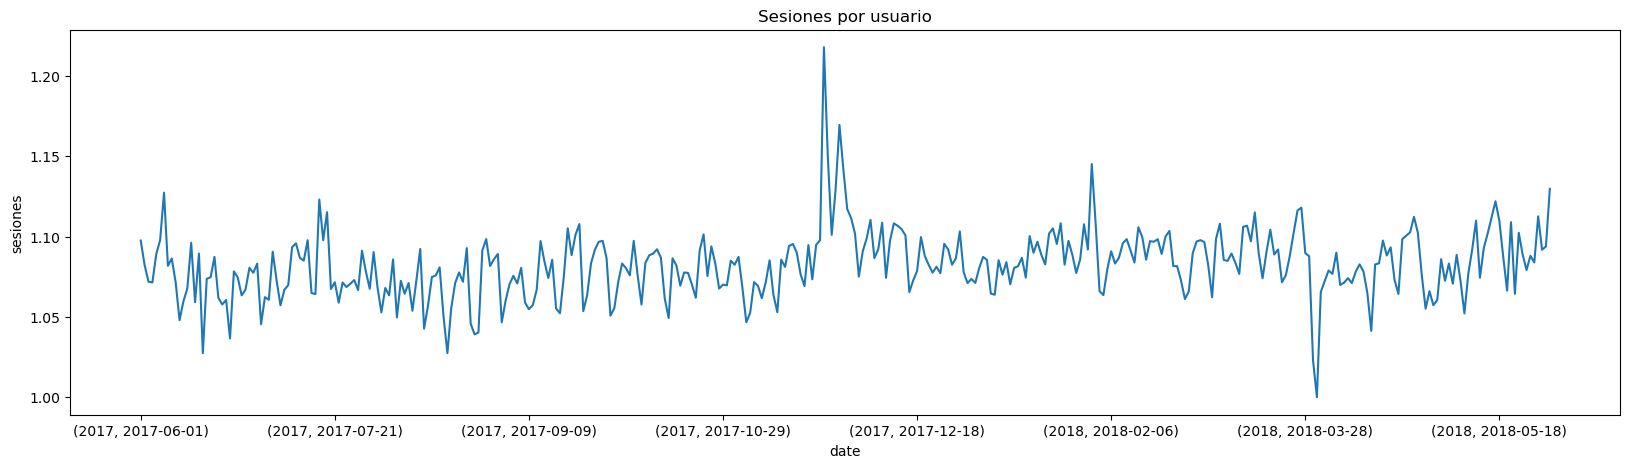

In [17]:
#Agrupar la tabla de visitas por año y por día, contar el número de usuarios únicos para cada grupo
sessions_per_day = clean_visits.groupby(['visit_year','visit_day']).agg({'uid':['count','nunique']})

#Cambiar nombres a las columnas, número de sesiones y número de usuarios
sessions_per_day.columns = ['n_sessions','n_users']

#Crear columna de sesiones por usuario, que es la división del número de sesiones entre el número de usuarios
sessions_per_day['sessions_per_user'] = (sessions_per_day['n_sessions'] / sessions_per_day['n_users'])
plt.figure(figsize=(20,5))
sessions_per_day['sessions_per_user'].plot(kind='line').set(title='Sesiones por usuario',xlabel='date',ylabel='sesiones')

#Calcular la media del el daily active users
display(sessions_per_day)
dau = sessions_per_day['sessions_per_user'].mean().round(2)
print(f"Media de usuarios activos por día durante todo el período de análisis: {dau}")

#### NOTAS
* Durante todo el período de análisis se obtiene una media de una sesión por usuario por día.
* Hay un pico de actividad en noviembre del 2017. Puede deberse a alguna campaña publicitaria o promocion vigente.
* En marzo de 2018 la media de sesiones por usuario por día cayó, pero no abajo de 1, significando que aún había visitas.

## ¿Cuál es la duración de cada sesión?

84480


array([[<Axes: title={'center': 'session_duration_sec'}>]], dtype=object)

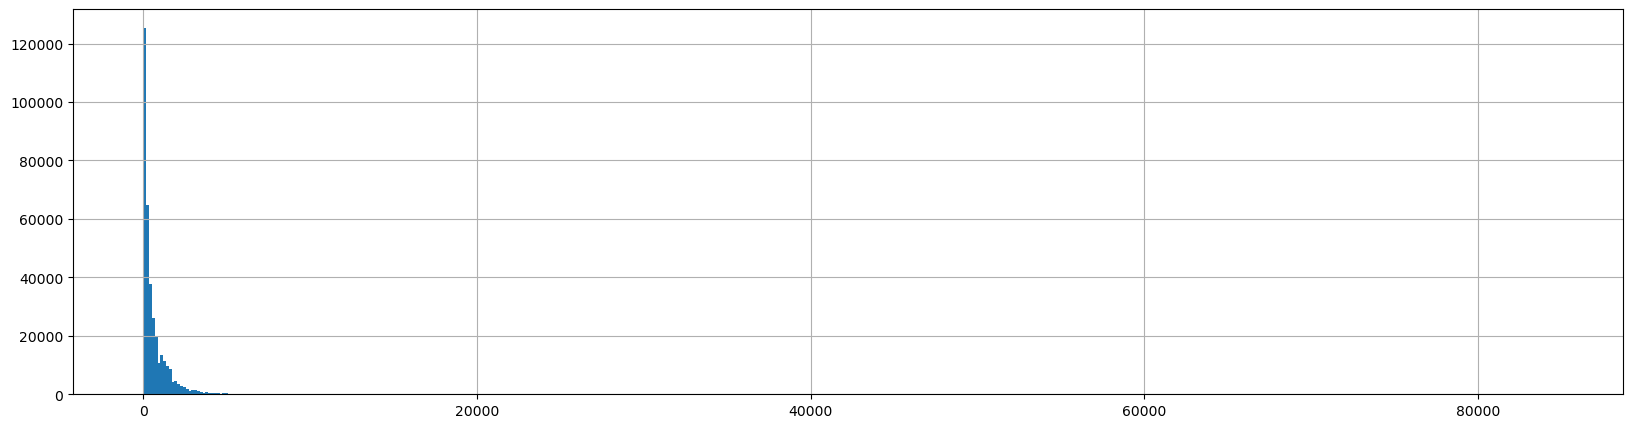

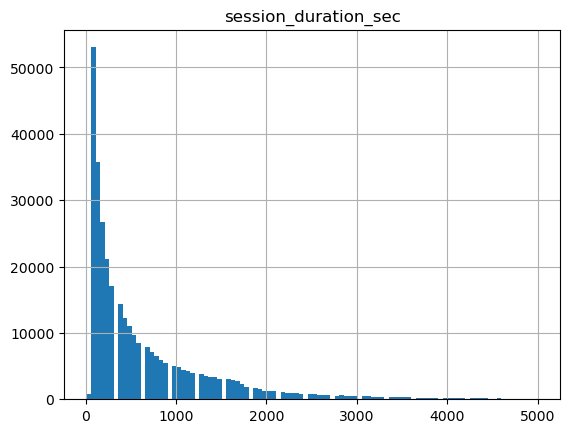

In [18]:
#Crear columna con la duración de cada sesión
clean_visits['session_duration_sec'] = (clean_visits['end_ts'] - clean_visits['start_ts']).dt.seconds
plt.figure(figsize=(20,5))
clean_visits['session_duration_sec'].hist(bins=500)

#Obtener la duración de sesión más grande registrada
print(clean_visits['session_duration_sec'].max())

#Histograma para mostrar la distribución de estas duraciones. Acotado a 5000 para mostrar mejor la distribución
clean_visits.hist(column=['session_duration_sec'],bins=100,range=[10, 5000])

In [19]:
#La distribución no es normal, ni cercana a normal, por lo que es más conveniente obtener la moda de esta distribución.
display(clean_visits['session_duration_sec'].mode())
# display(f"La duración más usual de una sesión es de: {duration} segundos")

0    60
Name: session_duration_sec, dtype: int32

#### NOTAS
* La duración más usual en el grupo de análisis es de 60 segundos. Que sean exactamente 60 segundos podría indicar alguna configuración de inactividad en la aplicación que pudiera cerrar la sesión sin permiso del usuario.
* Usamos el cálculo de la moda porque la distribución de los datos no es normal.

## ¿Con qué frecuencia los usuarios regresan?

In [20]:
clean_visits2

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [21]:
#Buscar cuándo fue la primera visita de cada usuario
first_visit_each_user = clean_visits2.groupby('uid')['start_ts'].min().reset_index()

#Cambiar nombres de columnas
first_visit_each_user.columns=['uid','first_visit_ts']

#Obtener el día de primera visita a partir del timestamp original first_visit_ts
first_visit_each_user['first_visit_day'] = first_visit_each_user['first_visit_ts'].dt.to_period('D').dt.to_timestamp()

#Obtener el mes de primera visita a partir del timestamp original first_visit_ts
first_visit_each_user['first_visit_month'] = first_visit_each_user['first_visit_ts'].dt.to_period('M').dt.to_timestamp()
first_visit_each_user

,uid,first_visit_ts,first_visit_day,first_visit_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-30,2017-11-01
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01


In [22]:
#Unir la tabla con día y mes de primera visita, con la tabla original de visitas
visits_full = pd.merge(clean_visits2,first_visit_each_user,how='inner',on='uid')

#Obtener el mes de visita a partir del timestamp original start_ts
visits_full['visit_month'] = visits_full['start_ts'].dt.to_period('D').dt.to_timestamp()
visits_full

,device,end_ts,source_id,start_ts,uid,first_visit_ts,first_visit_day,first_visit_month,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20,2017-12-01,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19,2018-02-01,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03-09,2018-03-01,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27,2017-12-01,2017-12-27
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00,2017-07-29,2017-07-01,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00,2018-01-25,2018-01-01,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00,2018-03-03,2018-03-01,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00,2017-11-02,2017-11-01,2017-11-02


In [23]:
# first_visit_each_user['first_visit_month'] = first_visit_each_user['first_visit_ts'].apply(lambda fecha: pd.to_datetime(fecha.strftime('%Y-%m-01')))
# first_visit_each_user['first_visit_month'] = first_visit_each_user['first_visit_ts'].apply(lambda x: x.replace(day=1)).dt.normalize()

In [24]:
#Calcular el tiempo que ha pasado desde la primera visita, hasta la visita actual, esto para cada registro
#Obtener el primer día del mes correspondiente a la fecha de primera visita first_visit_ts
first_visit_each_user['first_visit_month'] = first_visit_each_user['first_visit_ts'].dt.to_period('M').dt.to_timestamp()
first_visit_each_user

,uid,first_visit_ts,first_visit_day,first_visit_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-30,2017-11-01
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01


In [25]:
#Calcular la edad en meses para cada registro (la diferencia entre el mes de visita de esa fila contra el mes de primera visita de esa fila)
visits_full['age_months'] = ((visits_full['visit_month']-visits_full['first_visit_month']) / (30 * np.timedelta64(1,'D'))).round().astype(int)
visits_full

,device,end_ts,source_id,start_ts,uid,first_visit_ts,first_visit_day,first_visit_month,visit_month,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20,2017-12-01,2017-12-20,1
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19,2018-02-01,2018-02-19,1
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03-09,2018-03-01,2018-05-20,3
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27,2017-12-01,2017-12-27,1
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00,2017-07-29,2017-07-01,2017-07-29,1
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00,2018-01-25,2018-01-01,2018-01-25,1
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00,2018-03-03,2018-03-01,2018-03-03,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00,2017-11-02,2017-11-01,2017-11-02,0


In [26]:
#Crear las cohortes
cohorts = visits_full.pivot_table(
    index='first_visit_month',
    columns='age_months',
    values='uid',
    aggfunc='nunique')
cohorts.fillna(0)                                

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
first_visit_month,,,,,,,,,,,,,
2017-06-01,7994.0,5961.0,804.0,735.0,918.0,811.0,949.0,724.0,760.0,691.0,631.0,516.0,464.0
2017-07-01,7327.0,6299.0,733.0,688.0,711.0,720.0,601.0,561.0,615.0,425.0,357.0,272.0,0.0
2017-08-01,4637.0,5884.0,663.0,588.0,621.0,446.0,418.0,395.0,334.0,268.0,185.0,0.0,0.0
2017-09-01,7831.0,9539.0,1152.0,1050.0,701.0,649.0,645.0,450.0,408.0,247.0,0.0,0.0,0.0
2017-10-01,13457.0,13699.0,1738.0,1047.0,1014.0,872.0,680.0,482.0,362.0,0.0,0.0,0.0,0.0
2017-11-01,13241.0,15293.0,1398.0,1126.0,986.0,761.0,583.0,369.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,13450.0,12745.0,1169.0,861.0,637.0,442.0,312.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,11536.0,11827.0,1054.0,642.0,496.0,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,13310.0,9693.0,795.0,470.0,243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#Calcular sticky rate para las cohortes
sticky_rate = pd.DataFrame()
for age_months in cohorts.columns:
    sticky_rate = pd.concat([sticky_rate,cohorts[age_months]/cohorts[0]],axis=1)
sticky_rate

C:\Users\Javi\AppData\Local\Temp\ipykernel_25076\2627429385.py:4: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sticky_rate = pd.concat([sticky_rate,cohorts[age_months]/cohorts[0]],axis=1)


,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-06-01 00:00:00,1.0,0.745684,0.100575,0.091944,0.114836,0.101451,0.118714,0.090568,0.095071,0.086440,0.078934,0.064548,0.058044
2017-07-01 00:00:00,1.0,0.859697,0.100041,0.093899,0.097038,0.098267,0.082025,0.076566,0.083936,0.058005,0.048724,0.037123,NaN
2017-08-01 00:00:00,1.0,1.268924,0.142980,0.126806,0.133923,0.096183,0.090144,0.085184,0.072029,0.057796,0.039896,NaN,NaN
2017-09-01 00:00:00,1.0,1.218108,0.147108,0.134082,0.089516,0.082876,0.082365,0.057464,0.052101,0.031541,NaN,NaN,NaN
2017-10-01 00:00:00,1.0,1.017983,0.129152,0.077803,0.075351,0.064799,0.050531,0.035818,0.026900,NaN,NaN,NaN,NaN
2017-11-01 00:00:00,1.0,1.154973,0.105581,0.085039,0.074466,0.057473,0.044030,0.027868,NaN,NaN,NaN,NaN,NaN
2017-12-01 00:00:00,1.0,0.947584,0.086914,0.064015,0.047361,0.032862,0.023197,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,1.0,1.025225,0.091366,0.055652,0.042996,0.022278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:00:00,1.0,0.728249,0.059730,0.035312,0.018257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 00:00:00,1.0,0.954039,0.060053,0.029566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Asignar el mismo nombre de columnas para la tabla de sticky rate
sticky_rate.columns = cohorts.columns

#Quitar la hora de los índices de la tabla
sticky_rate.index = [str(date)[:10] for date in sticky_rate.index]
sticky_rate

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
2017-06-01,1.0,0.745684,0.100575,0.091944,0.114836,0.101451,0.118714,0.090568,0.095071,0.086440,0.078934,0.064548,0.058044
2017-07-01,1.0,0.859697,0.100041,0.093899,0.097038,0.098267,0.082025,0.076566,0.083936,0.058005,0.048724,0.037123,NaN
2017-08-01,1.0,1.268924,0.142980,0.126806,0.133923,0.096183,0.090144,0.085184,0.072029,0.057796,0.039896,NaN,NaN
2017-09-01,1.0,1.218108,0.147108,0.134082,0.089516,0.082876,0.082365,0.057464,0.052101,0.031541,NaN,NaN,NaN
2017-10-01,1.0,1.017983,0.129152,0.077803,0.075351,0.064799,0.050531,0.035818,0.026900,NaN,NaN,NaN,NaN
2017-11-01,1.0,1.154973,0.105581,0.085039,0.074466,0.057473,0.044030,0.027868,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.947584,0.086914,0.064015,0.047361,0.032862,0.023197,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,1.025225,0.091366,0.055652,0.042996,0.022278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.728249,0.059730,0.035312,0.018257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,1.0,0.954039,0.060053,0.029566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


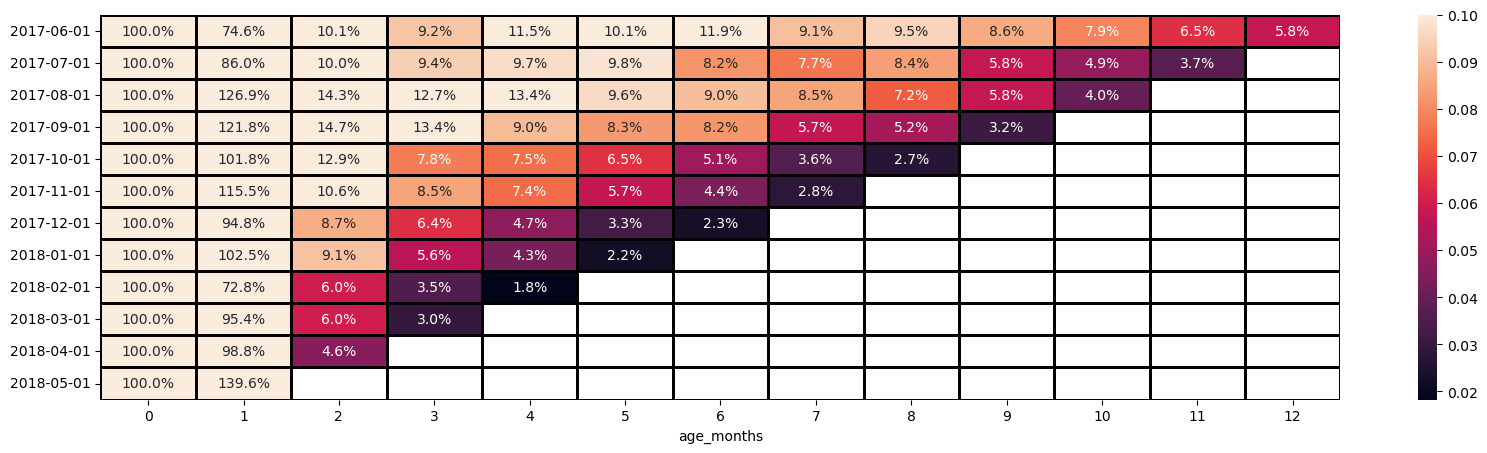

In [29]:
#Heatmap de la tabla de sticky_rate
plt.figure(figsize=(20,5))
sns.heatmap(sticky_rate,
           annot=True,
           fmt='.1%',
           linewidth=2,
           linecolor='black',
           vmax=0.1,
           )
plt.show()

#### NOTAS
* Todas las cohortes muestran una tasa de retención superior al 70% en el primer mes de edad, pero ninguna supera el 15% para el segundo mes.
* La cohorte de mayo de 2018 es la que muestra una mayor tasa de retención en el primer mes de vida.
* Las cohortes de octubre 2017 a febrero 2018 muestra una tasa de retención de menos del 3% en su último mes de vida.
* La cohorte con la menor tasa de retención en su último mes de visa es la de febrero de 2018

# 2. VENTAS

## ¿Cuándo empieza la gente a comprar?

In [30]:
clean_orders2 = clean_orders.copy()
clean_orders2.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [31]:
#Obetener día de compra a partir del timestamp original buy_ts
clean_orders2['buy_day'] = clean_orders2['buy_ts'].dt.date

#Obetener mes de compra a partir del timestamp original buy_ts
clean_orders2['buy_month'] = clean_orders2['buy_ts'].dt.to_period('M').dt.to_timestamp()
clean_orders2

,buy_ts,revenue,uid,buy_day,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01


In [32]:
#Encontrar el primer mes de compra de cada usuario
first_buys = clean_orders2.groupby('uid')['buy_ts'].min().reset_index()

#Cambiar nombres de columnas
first_buys.columns = ['uid','first_buy_ts']

#Obtener el día de primera compra a partir del timestamp original first_buy_ts
first_buys['first_buy_day'] = first_buys['first_buy_ts'].dt.to_period('D').dt.to_timestamp()

#Obtener el mes de primera compra a partir del timestamp original first_buy_ts
first_buys['first_buy_month'] = first_buys['first_buy_ts'].dt.to_period('M').dt.to_timestamp()
first_buys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   uid              36523 non-null  uint64        
 1   first_buy_ts     36523 non-null  datetime64[ns]
 2   first_buy_day    36523 non-null  datetime64[ns]
 3   first_buy_month  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](3), uint64(1)
memory usage: 1.1 MB


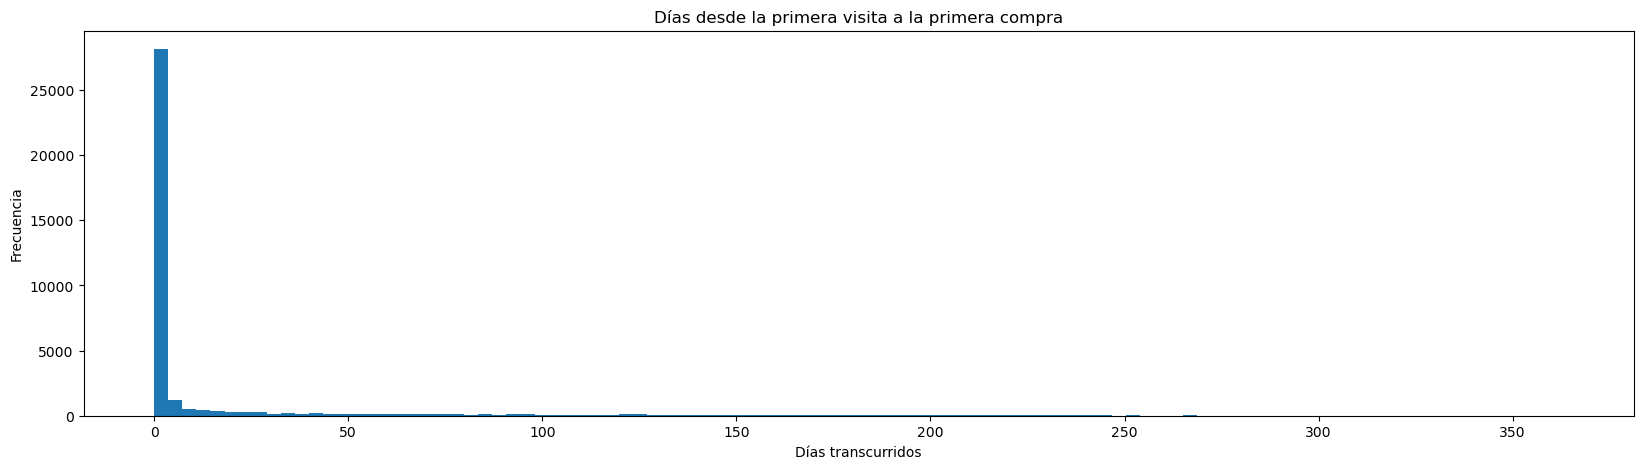

0    0.0
Name: days_to_first_buy, dtype: float64

In [33]:
#Unir la tabla de primeras visitas con la tabla de primeras compras
buyers = pd.merge(first_visit_each_user,first_buys,how='inner',on='uid')

#Calcular cuántos días pasan entre la primer visita y la primer compra
buyers['days_to_first_buy'] = buyers['first_buy_day'] - buyers['first_visit_day']
buyers['days_to_first_buy'] = buyers['days_to_first_buy'].dt.total_seconds() / (24*3600)
# print(buyers)

#Mostrar distribución del tiempo entre primer visita y primer compra
plt.figure(figsize=(20,5))
buyers['days_to_first_buy'].plot(kind='hist',bins=100).set(title='Días desde la primera visita a la primera compra',xlabel='Días transcurridos',ylabel='Frecuencia')
plt.show()
buyers['days_to_first_buy'].mode()

#### NOTAS
* La mayoría de los usuarios tardan menos de 24 horas entre su primer visita y su primera compra. Esto es un buen indicador. Puede ser que ya conocen el producto antes de entrar al portal a comprarlo, o que las campañas de marketing son efectivas y enganchan al usuario para hacer una compra recién hacen su primera visita.

## ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [34]:
display(buyers)
orders_visits = pd.merge(clean_visits2,clean_orders2,how='inner',on='uid')
display(orders_visits)

,uid,first_visit_ts,first_visit_day,first_visit_month,first_buy_ts,first_buy_day,first_buy_month,days_to_first_buy
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,107.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,1.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0.0
...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,96.0
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0.0
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,231.0
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,103.0


,device,end_ts,source_id,start_ts,uid,buy_ts,revenue,buy_day,buy_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09,2018-03-01
1,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-04 12:46:00,2.44,2017-09-04,2017-09-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 00:01:00,1.53,2017-10-28,2017-10-01
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 19:16:00,1.53,2017-10-28,2017-10-01
4,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2017-06-25 08:54:00,3.67,2017-06-25,2017-06-01
...,...,...,...,...,...,...,...,...,...
761802,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00,2.93,2018-01-25,2018-01-01
761803,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 22:29:00,0.37,2018-01-25,2018-01-01
761804,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00,0.61,2018-03-03,2018-03-01
761805,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00,2.69,2017-11-02,2017-11-01


In [35]:
#Obtener el número de compradores inicial en cada cohorte
cohorts_size = buyers.groupby('first_buy_month')['uid'].nunique().reset_index()
cohorts_size.columns = ['first_buy_month','number_of_buyers']
cohorts_size

,first_buy_month,number_of_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [36]:
#Obtener el número de órdenes por cohorte
cohorts = pd.merge(clean_orders2,buyers,how='inner',on='uid')
report = cohorts.groupby(['first_buy_month','buy_month']).agg({'revenue':'count'}).reset_index()
report.columns = ['first_buy_month','buy_month','number_of_orders']
report

,first_buy_month,buy_month,number_of_orders
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292
...,...,...,...
74,2018-03-01,2018-05-01,176
75,2018-04-01,2018-04-01,2495
76,2018-04-01,2018-05-01,195
77,2018-05-01,2018-05-01,3249


In [37]:
#Obtener los meses transcurridos entre el mes de primera compra y el mes de compra
report['age_months'] = report['buy_month'] - report['first_buy_month']
report['age_months'] = (report['age_months'].dt.total_seconds() / (30.44 * 86400)).round().astype(int)
report

,first_buy_month,buy_month,number_of_orders,age_months
0,2017-06-01,2017-06-01,2354,0
1,2017-06-01,2017-07-01,177,1
2,2017-06-01,2017-08-01,174,2
3,2017-06-01,2017-09-01,226,3
4,2017-06-01,2017-10-01,292,4
...,...,...,...,...
74,2018-03-01,2018-05-01,176,2
75,2018-04-01,2018-04-01,2495,0
76,2018-04-01,2018-05-01,195,1
77,2018-05-01,2018-05-01,3249,0


In [38]:
#Unir las tablas de número inicial de compradores por cohorte con número de órdenes por cohorte
cohorts_report = pd.merge(cohorts_size,report,how='inner',on='first_buy_month')

#Calcular el ratio entre número de órdenes y número de compradores
cohorts_report['orders_per_buyer'] = cohorts_report['number_of_orders'] / cohorts_report['number_of_buyers']
cohorts_report

,first_buy_month,number_of_buyers,buy_month,number_of_orders,age_months,orders_per_buyer
0,2017-06-01,2023,2017-06-01,2354,0,1.163618
1,2017-06-01,2023,2017-07-01,177,1,0.087494
2,2017-06-01,2023,2017-08-01,174,2,0.086011
3,2017-06-01,2023,2017-09-01,226,3,0.111715
4,2017-06-01,2023,2017-10-01,292,4,0.144340
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,176,2,0.049816
75,2018-04-01,2276,2018-04-01,2495,0,1.096221
76,2018-04-01,2276,2018-05-01,195,1,0.085677
77,2018-05-01,2988,2018-05-01,3249,0,1.087349


In [39]:
#Crear la tabla de cohortes con una tabla dinámica
cohorts_orders_time = cohorts_report.pivot_table(
                                        index='first_buy_month',
                                        columns='age_months',
                                        values='orders_per_buyer')
cohorts_orders_time

age_months,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,1.163618,0.087494,0.086011,0.111715,0.144340,0.107761,0.136431,0.086011,0.104795,0.075630,0.047454,0.042511
2017-07-01,1.136765,0.052002,0.062402,0.054082,0.037441,0.042642,0.031721,0.026001,0.030161,0.012480,0.027561,NaN
2017-08-01,1.118978,0.078832,0.072993,0.059124,0.062044,0.045255,0.035766,0.056934,0.033577,0.033577,NaN,NaN
2017-09-01,1.136381,0.084851,0.062379,0.063541,0.025959,0.042232,0.041844,0.021697,0.023634,NaN,NaN,NaN
2017-10-01,1.143779,0.072350,0.037327,0.028111,0.029724,0.023733,0.019816,0.028802,NaN,NaN,NaN,NaN
2017-11-01,1.179368,0.097280,0.044597,0.051703,0.033325,0.014457,0.024994,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,0.061602,0.046087,0.040840,0.019621,0.023956,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,0.066410,0.047139,0.018974,0.023125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,0.060805,0.022733,0.019173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


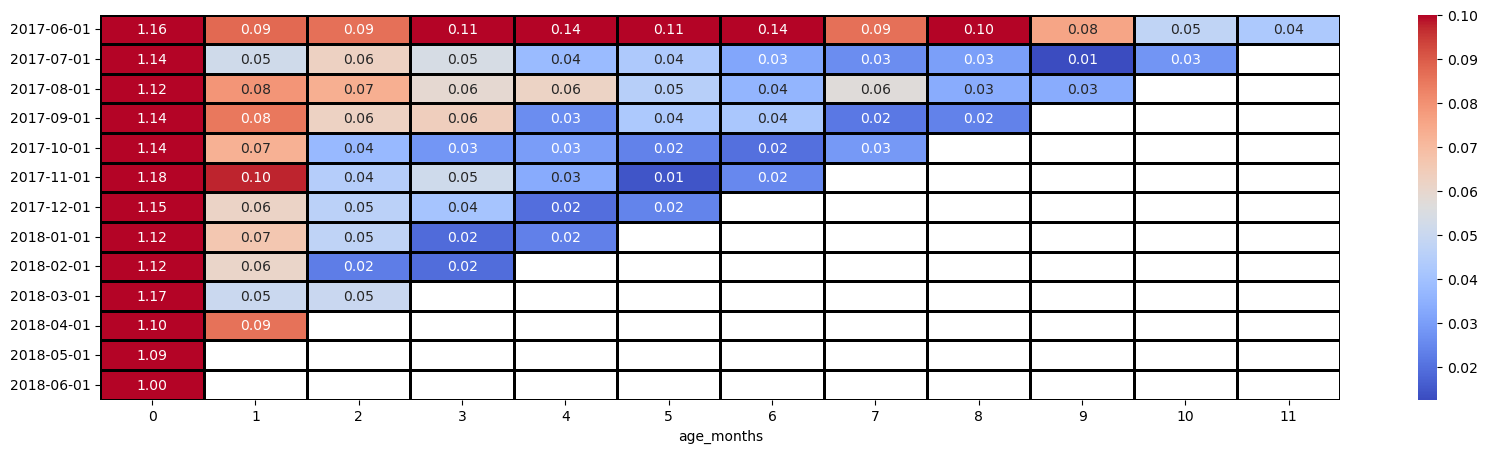

In [40]:
#Eliminar la hora del índice de la tabla
cohorts_orders_time.index = [str(fecha)[:10]for fecha in cohorts_orders_time.index]

#Dibujar heatmap
plt.figure(figsize=(20,5))
sns.heatmap(cohorts_orders_time,
            annot=True,
            fmt='.2f',
            linewidth=2,
            linecolor='black',
            vmax=0.1,
            cmap='coolwarm')
plt.show()

#### NOTAS
* Se observa que en general se hace más de una orden por cliente en el mes de primera visita de cada cliente.
* A partir del primer mes de vida, el porcentaje de órdenes generadas en relación con el número de clientes que componen la cohorte, cae a menos del 10% para la mayoría de las cohortes.
* La cohorte que muestra un porcentaje de órdenes más alto es la de junio del 2017.
* Que existan ratios tan bajos a partir del primer mes de vida, nos indica que la mayoría de usuarios son de una sola compra, es decir, se registran, compran y no vuelven a la plataforma.

## ¿Cuál es el tamaño promedio de compra?

In [41]:
#Filtrar la tabla de orders_visits y copiarla
revenue_table = orders_visits.loc[:, ['uid','end_ts','start_ts','buy_ts','revenue']]
revenue_table_notna = revenue_table.copy()

#Eliminar registros con valores ausentes
revenue_table_notna = revenue_table_notna.dropna(subset=['buy_ts']).reset_index(drop=True)
display(revenue_table_notna)

,uid,end_ts,start_ts,buy_ts,revenue
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,3.67
...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2.93
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,0.37
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,0.61
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2.69


In [42]:
#Mes de primera compra
first_buy = revenue_table_notna.groupby('uid')['buy_ts'].min().reset_index()
first_buy.columns = ['uid','first_buy']
display(first_buy)

,uid,first_buy
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [43]:
#Unir las tablas de revenue y primera compra
revenue_dates = pd.merge(revenue_table_notna,first_buy,on='uid',how='left')
display(revenue_dates)

,uid,end_ts,start_ts,buy_ts,revenue,first_buy
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,3.67,2017-06-25 08:54:00
...,...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2.93,2018-01-25 17:38:00
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,0.37,2018-01-25 17:38:00
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,0.61,2018-03-03 10:12:00
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2.69,2017-11-02 10:12:00


In [44]:
revenue_dates_per_month = revenue_dates.copy()

#Periodizar por mes
revenue_dates_per_month['buy_ts'] = pd.to_datetime(revenue_dates_per_month['buy_ts'])
revenue_dates_per_month['first_buy'] = pd.to_datetime(revenue_dates_per_month['first_buy'])

revenue_dates_per_month['buy_ts_month'] = revenue_dates_per_month['buy_ts'].dt.to_period('M')
revenue_dates_per_month['first_buy_month'] = revenue_dates_per_month['first_buy'].dt.to_period('M')

display(revenue_dates_per_month)

,uid,end_ts,start_ts,buy_ts,revenue,first_buy,buy_ts_month,first_buy_month
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03,2018-03
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09,2017-09
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-10,2017-09
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-10,2017-09
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,3.67,2017-06-25 08:54:00,2017-06,2017-06
...,...,...,...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2.93,2018-01-25 17:38:00,2018-01,2018-01
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,0.37,2018-01-25 17:38:00,2018-01,2018-01
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,0.61,2018-03-03 10:12:00,2018-03,2018-03
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2.69,2017-11-02 10:12:00,2017-11,2017-11


In [45]:
#Obtener cohortes por mes
revenue_lifetime = revenue_dates_per_month.copy()
revenue_lifetime['lifetime'] = (revenue_lifetime['buy_ts_month'] - revenue_lifetime['first_buy_month']).apply(lambda x: x.n)
display(revenue_lifetime)

,uid,end_ts,start_ts,buy_ts,revenue,first_buy,buy_ts_month,first_buy_month,lifetime
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03,2018-03,0
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09,2017-09,0
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-10,2017-09,1
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-10,2017-09,1
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,3.67,2017-06-25 08:54:00,2017-06,2017-06,0
...,...,...,...,...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2.93,2018-01-25 17:38:00,2018-01,2018-01,0
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,0.37,2018-01-25 17:38:00,2018-01,2018-01,0
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,0.61,2018-03-03 10:12:00,2018-03,2018-03,0
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2.69,2017-11-02 10:12:00,2017-11,2017-11,0


In [46]:
#Contar el número de compras y la suma de ingresos para cada grupo
revenue_lifetime_cohorts = revenue_lifetime.groupby(['first_buy_month','lifetime']).agg({'revenue':'sum','buy_ts':'count'}).reset_index()
display(revenue_lifetime_cohorts)

,first_buy_month,lifetime,revenue,buy_ts
0,2017-06,0,148121.29,25839
1,2017-06,1,155869.55,25677
2,2017-06,2,114898.83,25127
3,2017-06,3,374481.76,38866
4,2017-06,4,351833.14,44356
...,...,...,...,...
74,2018-03,2,81254.96,17765
75,2018-04,0,39756.01,6455
76,2018-04,1,44546.21,4885
77,2018-05,0,35600.77,7579


In [47]:
mean_revenue_per_cohort = revenue_lifetime_cohorts.copy()

#Calcular en ingreso medio por cada cohorte
mean_revenue_per_cohort['mean_revenue'] = mean_revenue_per_cohort['revenue'] / mean_revenue_per_cohort['buy_ts']
display(mean_revenue_per_cohort)

,first_buy_month,lifetime,revenue,buy_ts,mean_revenue
0,2017-06,0,148121.29,25839,5.732470
1,2017-06,1,155869.55,25677,6.070396
2,2017-06,2,114898.83,25127,4.572724
3,2017-06,3,374481.76,38866,9.635202
4,2017-06,4,351833.14,44356,7.932030
...,...,...,...,...,...
74,2018-03,2,81254.96,17765,4.573879
75,2018-04,0,39756.01,6455,6.158948
76,2018-04,1,44546.21,4885,9.118979
77,2018-05,0,35600.77,7579,4.697291


In [48]:
#Tabla pivote para los cohortes
mean_revenue_per_cohort_pivot = mean_revenue_per_cohort.pivot_table(index='first_buy_month',
                                                                    columns='lifetime',
                                                                    values='mean_revenue',
                                                                    aggfunc='sum')
display(mean_revenue_per_cohort_pivot.fillna('-'))

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,5.732470,6.070396,4.572724,9.635202,7.93203,6.829924,7.384208,6.694195,5.951091,7.382818,13.438989,10.300983
2017-07,11.288275,12.411805,17.313005,12.143702,7.562553,3.497643,2.95932,8.604241,17.260219,35.280948,6.304669,-
2017-08,6.992629,7.790639,6.74512,9.035915,10.266415,8.219747,7.591697,10.441345,6.891591,7.859939,-,-
2017-09,14.035068,30.616705,12.968429,116.819866,36.476173,28.944051,32.832135,23.857148,13.604955,-,-,-
2017-10,6.258202,10.34746,7.042316,9.97285,5.890545,6.300774,4.902404,3.983731,-,-,-,-
2017-11,5.835676,6.93955,7.75786,8.642107,6.10149,4.03133,6.853649,-,-,-,-,-
2017-12,4.236551,4.732341,9.120967,11.233298,8.64749,7.32108,-,-,-,-,-,-
2018-01,4.662853,4.964702,10.346075,6.763794,2.718705,-,-,-,-,-,-,-
2018-02,3.771818,4.565629,4.289049,3.245358,-,-,-,-,-,-,-,-


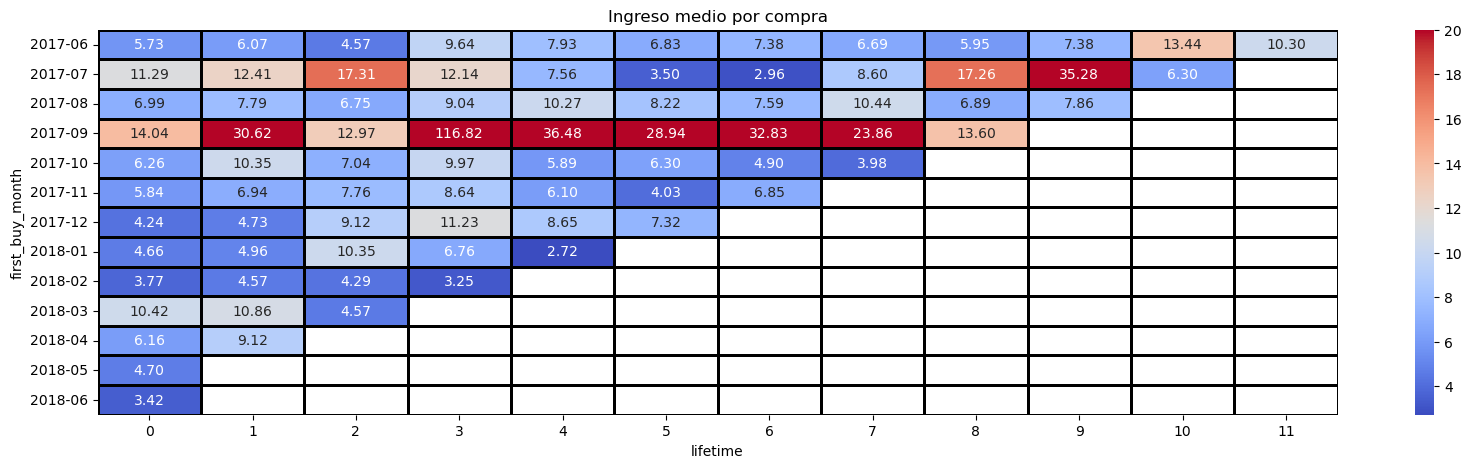

In [49]:
plt.figure(figsize=(20, 5))
plt.title('Ingreso medio por compra')
sns.heatmap(
    mean_revenue_per_cohort_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap='coolwarm',
    vmax=20
)
plt.show()

### NOTAS
* La cohorte que reporta mayores ingresos medios es la de septiembre de 2017
* A excepción de la cohorte de julio de 2017 en su noveno mes de vida, ninguna cohorte reporta una media superior a 20 dólares de ingreso por compra.

## ¿Cuánto dinero traen? (LTV)

In [50]:
revenue_lifetime.head()

,uid,end_ts,start_ts,buy_ts,revenue,first_buy,buy_ts_month,first_buy_month,lifetime
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03,2018-03,0
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09,2017-09,0
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-10,2017-09,1
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-10,2017-09,1
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,3.67,2017-06-25 08:54:00,2017-06,2017-06,0


In [51]:
revenue_report = revenue_lifetime.copy()

#Filtrar los datos de revenue_report
revenue_report = revenue_report.loc[:, ['uid','buy_ts_month','first_buy_month','revenue']]
display(revenue_report)

,uid,buy_ts_month,first_buy_month,revenue
0,16174680259334210214,2018-03,2018-03,2.33
1,16007536194108375387,2017-09,2017-09,2.44
2,16007536194108375387,2017-10,2017-09,1.53
3,16007536194108375387,2017-10,2017-09,1.53
4,8056418121947262981,2017-06,2017-06,3.67
...,...,...,...,...
761802,18370831553019119586,2018-01,2018-01,2.93
761803,18370831553019119586,2018-01,2018-01,0.37
761804,18387297585500748294,2018-03,2018-03,0.61
761805,18388616944624776485,2017-11,2017-11,2.69


In [52]:
#Número de clientes por mes
cohort_clients_per_month = revenue_report.groupby('first_buy_month').agg({'uid':'nunique'}).reset_index()
cohort_clients_per_month.columns = ['first_buy_month','n_buyers']
display(cohort_clients_per_month)

,first_buy_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [53]:
#Creación de las cohortes según el mes de compra y primera compra, y la suma de los ingresos para cada una
revenue_cohorts = (revenue_report.groupby(['first_buy_month','buy_ts_month']).agg({'revenue':'sum'}).reset_index())
display(revenue_cohorts)

,first_buy_month,buy_ts_month,revenue
0,2017-06,2017-06,148121.29
1,2017-06,2017-07,155869.55
2,2017-06,2017-08,114898.83
3,2017-06,2017-09,374481.76
4,2017-06,2017-10,351833.14
...,...,...,...
74,2018-03,2018-05,81254.96
75,2018-04,2018-04,39756.01
76,2018-04,2018-05,44546.21
77,2018-05,2018-05,35600.77


In [54]:
#Combinar las cohortes con los ingresos
report = pd.merge(cohort_clients_per_month,revenue_cohorts,on='first_buy_month')
display(report)

,first_buy_month,n_buyers,buy_ts_month,revenue
0,2017-06,2023,2017-06,148121.29
1,2017-06,2023,2017-07,155869.55
2,2017-06,2023,2017-08,114898.83
3,2017-06,2023,2017-09,374481.76
4,2017-06,2023,2017-10,351833.14
...,...,...,...,...
74,2018-03,3533,2018-05,81254.96
75,2018-04,2276,2018-04,39756.01
76,2018-04,2276,2018-05,44546.21
77,2018-05,2988,2018-05,35600.77


In [55]:
result_report = report.copy()
margin_rate = 0.4

#Calcular las ganancias brutas
result_report['gp'] = result_report['revenue'] * margin_rate

#Calcular la edad de las cohortes
result_report['age'] = ((result_report['buy_ts_month'].dt.year - result_report['first_buy_month'].dt.year) * 12 + (result_report['buy_ts_month'].dt.month - result_report['first_buy_month'].dt.month))
result_report['age'] = result_report['age'].round().astype('int')

display(result_report)

,first_buy_month,n_buyers,buy_ts_month,revenue,gp,age
0,2017-06,2023,2017-06,148121.29,59248.516,0
1,2017-06,2023,2017-07,155869.55,62347.820,1
2,2017-06,2023,2017-08,114898.83,45959.532,2
3,2017-06,2023,2017-09,374481.76,149792.704,3
4,2017-06,2023,2017-10,351833.14,140733.256,4
...,...,...,...,...,...,...
74,2018-03,3533,2018-05,81254.96,32501.984,2
75,2018-04,2276,2018-04,39756.01,15902.404,0
76,2018-04,2276,2018-05,44546.21,17818.484,1
77,2018-05,2988,2018-05,35600.77,14240.308,0


In [56]:
#Obtener el valor de vida del cliente en relación al número de clientes que iniciaron en cada cohorte
result_report['ltv'] = result_report['gp'] / result_report['n_buyers']

#Tabla dinámica
result = result_report.pivot_table(index='first_buy_month',
                                    columns='age',
                                    values='ltv',
                                    aggfunc='mean').round()
display(result.fillna('-'))

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,29.0,31.0,23.0,74.0,70.0,44.0,71.0,41.0,49.0,42.0,44.0,19.0
2017-07,20.0,10.0,31.0,11.0,4.0,5.0,3.0,3.0,6.0,8.0,5.0,-
2017-08,14.0,12.0,10.0,12.0,20.0,9.0,7.0,15.0,6.0,5.0,-,-
2017-09,27.0,24.0,9.0,127.0,15.0,19.0,26.0,9.0,4.0,-,-,-
2017-10,8.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,-,-,-,-
2017-11,12.0,8.0,4.0,8.0,3.0,0.0,3.0,-,-,-,-,-
2017-12,7.0,3.0,7.0,6.0,2.0,2.0,-,-,-,-,-,-
2018-01,8.0,5.0,6.0,2.0,1.0,-,-,-,-,-,-,-
2018-02,5.0,3.0,1.0,1.0,-,-,-,-,-,-,-,-


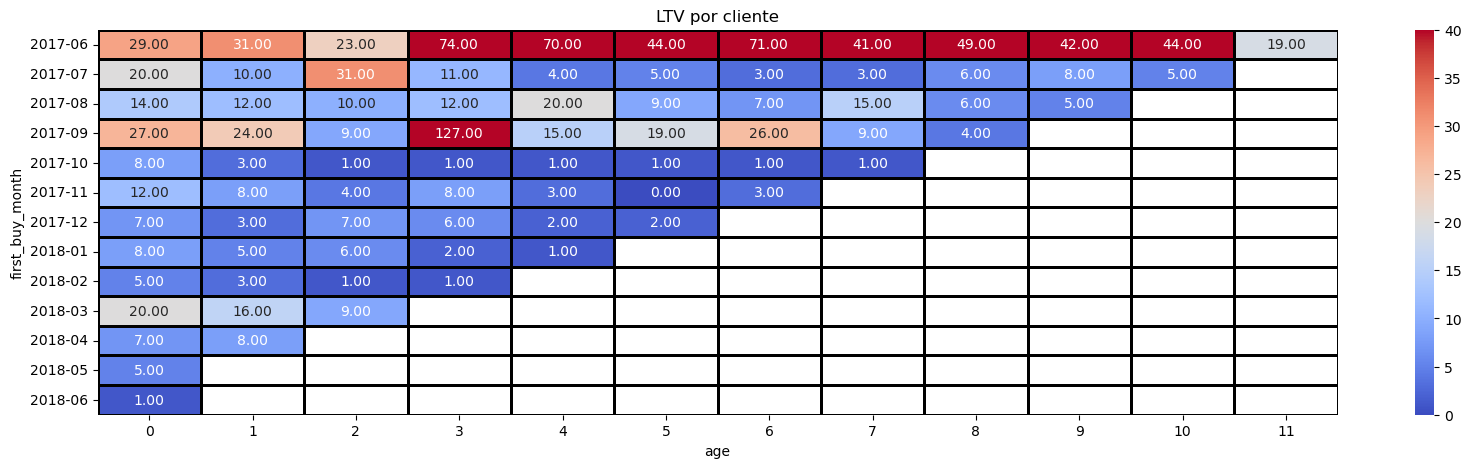

In [57]:
plt.figure(figsize=(20, 5))
plt.title('LTV por cliente')
sns.heatmap(
    result,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap='coolwarm',
    vmax=40
)
plt.show()

In [58]:
#LTV total de cada cohorte
sum = result.sum(axis=1)

# Visualiazarlo resultado en un DataFrame
sum_result = pd.DataFrame({'total_by_month': sum})

# Mostrar el resultado
display(sum_result)

,total_by_month
first_buy_month,
2017-06,537.0
2017-07,106.0
2017-08,110.0
2017-09,260.0
2017-10,17.0
2017-11,38.0
2017-12,27.0
2018-01,22.0
2018-02,10.0


### NOTAS
* El mapa de calor muestra que la cohorte con el mayor LTV medio por cliente mayor corresponde a junio de 2017
* A excepción de la cohorte de septiembre 2017 en su tercer mes de vida, ninguna cohorte en ningún mes de vida superó un LTV de $40 USD de media

# 3. Marketing

## ¿Cuánto dinero se gastó? (Total / por fuente de adquisición / a lo largo del tiempo)

In [59]:
display(clean_costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [69]:
costs_dates = clean_costs.copy()

#Cambiar tipo de datos de las columnas que lo requieran y obtene
costs_dates['dt']=  pd.to_datetime(costs_dates['dt'])
# costs_dates['dt_hour'] = costs_dates['dt'].dt.hour
# costs_dates['dt_minute'] = costs_dates['dt'].dt.minute
# costs_dates['dt_second'] = costs_dates['dt'].dt.second
display(costs_dates)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [61]:
#Anuncios que generan gastos de marketing
costs_channels = clean_costs.copy()
costs_channels = costs_channels['source_id'].unique()
display(costs_channels)

#Extraer mes y año de la columna dt
costs_dates = clean_costs.copy()
costs_dates['dt_month'] = costs_dates['dt'].dt.month
costs_dates['dt_year'] = costs_dates['dt'].dt.year

display(costs_dates)

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

,source_id,dt,costs,dt_month,dt_year
0,1,2017-06-01,75.20,6,2017
1,1,2017-06-02,62.25,6,2017
2,1,2017-06-03,36.53,6,2017
3,1,2017-06-04,55.00,6,2017
4,1,2017-06-05,57.08,6,2017
...,...,...,...,...,...
2537,10,2018-05-27,9.92,5,2018
2538,10,2018-05-28,21.26,5,2018
2539,10,2018-05-29,11.32,5,2018
2540,10,2018-05-30,33.15,5,2018


In [62]:
costs_source = costs_dates.copy()

# Agrupamos por fuente, año, mes y sumamos los costos para cada grupo
costs_source = costs_source.groupby(['source_id','dt_year','dt_month']).agg({'costs': 'sum'})
display(costs_source)

costs
source_id dt_year dt_month         
1         2017    6         1125.61
                  7         1072.88
                  8          951.81
                  9         1502.01
                  10        2315.75
...                             ...
10        2018    1          614.35
                  2          480.88
                  3          526.41
                  4          388.25
                  5          409.86

[84 rows x 1 columns]

In [63]:
costs_pivot = costs_source.copy()
# Creación de la tabla dinámica
costs_pivot = costs_pivot.pivot_table(index=['dt_year','source_id'], columns='dt_month', values='costs', aggfunc='sum')
display(costs_pivot.fillna('-'))

dt_month                 1         2         3        4        5        6   \
dt_year source_id                                                            
2017    1                 -         -         -        -        -  1125.61   
        2                 -         -         -        -        -  2427.38   
        3                 -         -         -        -        -  7731.65   
        4                 -         -         -        -        -   3514.8   
        5                 -         -         -        -        -  2616.12   
        9                 -         -         -        -        -   285.22   
        10                -         -         -        -        -   314.22   
2018    1           2186.18   2204.48   1893.09  1327.49  1467.61        -   
        2           4157.74   4474.34   3943.14   2993.7  2689.44        -   
        3          14808.78  14228.56  13080.85  9296.81  9411.42        -   
        4           5832.79   5711.96   5961.87  4408.49  4214.21        -   
        5           5371.52   5071.31   4529.62  3501.15  3669.56        -   
        9            547.16     551.5    480.29   373.49   362.17        -   
        10           614.35    480.88    526.41   388.25   409.86        -   

dt_month                7        8        9         10        11        12  
dt_year source_id                                                           
2017    1          1072.88   951.81  1502.01   2315.75   2445.16    2341.2  
        2          2333.11  1811.05  2985.66    4845.0   5247.68    4897.8  
        3          7674.37  6143.54  9963.55  15737.24  17025.34  16219.52  
        4          3529.73  3217.36  5192.26   6420.84   5388.82   7680.47  
        5          2998.14  2185.28  3849.14    5767.4   6325.34   5872.52  
        9           302.54   248.93   415.62    609.41    683.18    657.98  
        10          329.82   232.57   460.67    627.24    792.36    645.86  
2018    1                -        -        -         -         -         -  
        2                -        -        -         -         -         -  
        3                -        -        -         -         -         -  
        4                -        -        -         -         -         -  
        5                -        -        -         -         -         -  
        9                -        -        -         -         -         -  
        10               -        -        -         -         -         -

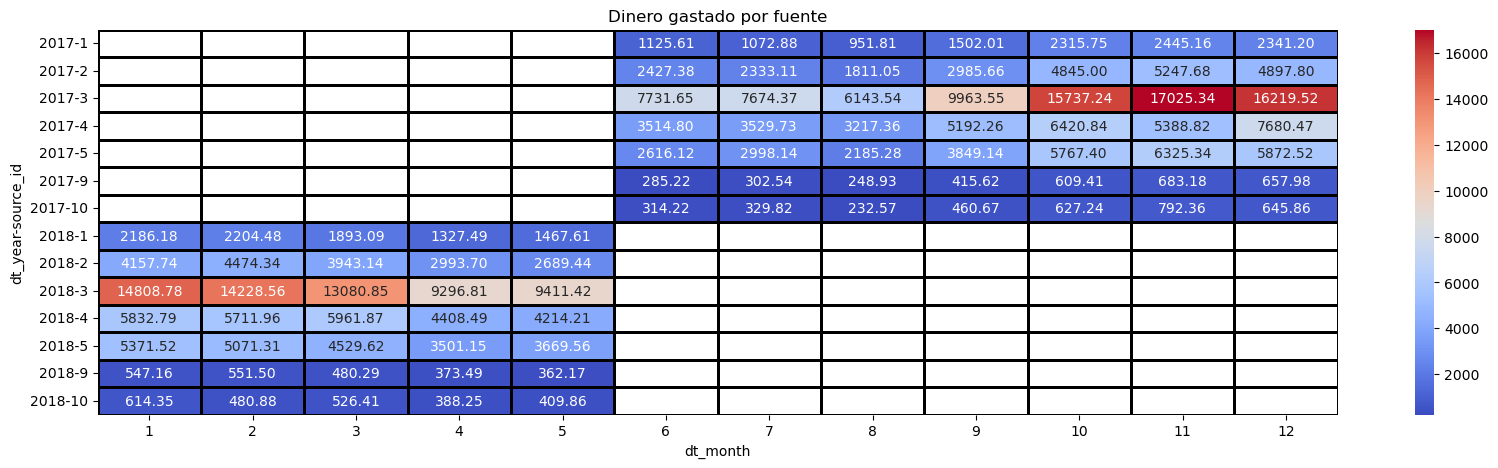

In [70]:
plt.figure(figsize=(20, 5))
plt.title('Dinero gastado por fuente')
sns.heatmap(
    costs_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap='coolwarm',
    # vmax=40
)
plt.show()

### NOTAS
* La fuente que genera más gastos tanto en 2017 como 2018 es la número 3 con gastos superiores a los $13,000 USD (excepto en el cuarto y quinto mes de vida de 2018)
* Las fuentes menos costosas en ambos años corresponden a la 9 y 10.

## ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [72]:
display(costs_dates)
#Filtrar tabla clean_visits y clean_costs
visits_filter = clean_visits[['source_id','uid','start_ts']]
costs_filter = clean_costs[['source_id','costs','dt']]
visits_costs = pd.merge(visits_filter,costs_filter,on='source_id',how='left')
display(visits_costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


,source_id,uid,start_ts,costs,dt
0,4,16879256277535980062,2017-12-20 17:20:00,76.74,2017-06-01
1,4,16879256277535980062,2017-12-20 17:20:00,59.21,2017-06-02
2,4,16879256277535980062,2017-12-20 17:20:00,59.39,2017-06-03
3,4,16879256277535980062,2017-12-20 17:20:00,161.97,2017-06-04
4,4,16879256277535980062,2017-12-20 17:20:00,44.65,2017-06-05
...,...,...,...,...,...
130513896,2,18396128934054549559,2017-09-10 13:13:00,113.35,2018-05-27
130513897,2,18396128934054549559,2017-09-10 13:13:00,82.67,2018-05-28
130513898,2,18396128934054549559,2017-09-10 13:13:00,105.75,2018-05-29
130513899,2,18396128934054549559,2017-09-10 13:13:00,119.26,2018-05-30


In [74]:
visits_costs_loc = visits_costs.copy()

# Seleccionamos de la tabla unicamente los datos que nos interesa
visits_costs_loc = visits_costs.loc[:,['uid','source_id','costs','dt','start_ts']]

# Filtra las filas donde la fecha de costs_date esté dentro del rango de fechas de visits_costs
visits_costs_loc = visits_costs_loc[(visits_costs_loc['dt']>= visits_costs_loc['start_ts'])]

# Agrupamos por source_id y calculamos el CAC y el número de clientes únicos
costs_users_per_source = visits_costs_loc.groupby('source_id').agg(
    total_costs=('costs', 'sum'),
    unique_users=('uid', 'nunique')
).reset_index()

# Calculamos el CAC (Costo Total / Numero de Clientes Adquiridos)
costs_users_per_source['CAC'] = costs_users_per_source['total_costs'] / costs_users_per_source['unique_users']

# Resltado Final
display(costs_users_per_source[['source_id', 'CAC', 'unique_users']])

,source_id,CAC,unique_users
0,1,17897.395804,18836
1,2,37321.857388,25765
2,3,79860.385353,74414
3,4,34307.807218,83102
4,5,30718.122324,56770
5,9,3794.118910,9232
6,10,3142.280552,7949


### NOTAS
* La fuente con el mayor costo de adquisición de clientes es la 3. Este resultado corresponde con el mapa de calor de la sección anterior
* Las fuentes con el menor CAC son la 9 y 10, que de nuevo se comprueban con el heatmap
* Se puede notar que la fuente con mayor número de usuarios únicos es la 4, y tienen un CAC menor a la mitad de la fuente número 3. Se debe revisar la estrategia de la fuente 3.

## ¿Cuán rentables eran las inversiones? (ROMI)

In [67]:
# display(visits_orders)
visits_orders_filter = orders_visits[['source_id','revenue']]

#Unir las tablas visits_orders_filter con cost_filter
visits_costs_rm = pd.merge(visits_orders_filter, costs_filter, on='source_id', how='left')

# Eliminar filas con valores nulos de visits_costs_rm
visits_orders_clean = visits_costs_rm.dropna()
display(visits_orders_clean)

,source_id,revenue,costs,dt
0,9,2.33,13.06,2017-06-01
1,9,2.33,18.13,2017-06-02
2,9,2.33,7.06,2017-06-03
3,9,2.33,4.65,2017-06-04
4,9,2.33,15.30,2017-06-05
...,...,...,...,...
276687398,2,1.22,113.35,2018-05-27
276687399,2,1.22,82.67,2018-05-28
276687400,2,1.22,105.75,2018-05-29
276687401,2,1.22,119.26,2018-05-30


In [68]:
romi_data = visits_orders_clean.copy()

# Calcula el total costs y revenue por source_id (dentificador de la fuente de anuncios)
romi_data = romi_data.groupby('source_id').agg(
                                            total_costs=('costs', 'sum'),
                                            total_revenue=('revenue', 'sum')
                                            ).reset_index()

# Calcular ROMI usando las columnas combinadas
romi_data['ROMI'] = (romi_data['total_revenue'] - romi_data['total_costs']) / romi_data['total_costs']
display(romi_data)

,source_id,total_costs,total_revenue,ROMI
0,1,5.180443e+09,8.342467e+08,-0.838962
1,2,1.020055e+10,9.576627e+08,-0.906117
2,3,6.609047e+09,1.076977e+08,-0.983705
3,4,3.828276e+09,1.802985e+08,-0.952903
4,5,7.857970e+09,4.300577e+08,-0.945271
5,9,5.267548e+07,1.319224e+07,-0.749556
6,10,2.344717e+07,5.306780e+06,-0.773671


### NOTAS
* Ninguna de las fuentes ha dado un ROMI mayor a 1, lo que significa que existen pérdidas en todas las fuentes
* A pesar de ser la fuente con el CAC más alto, la fuente número 3 es la que muestra un mejor ROMI (cercano a 1). Aún así, sigue mostrando pérdidas
* Las fuetes 9 y 10 que requerían el menor gasto, son las que reportan el peor retorno de inversión del conjunto

# 4. MÉTRICAS POR DISPOSITIVOS Y POR FUENTES

## Usuarios únicos por dispositivos y fuentes de adquisición

In [77]:
#Agrupar el número de visitantes únicos por dispositivo y por fuente
total_ds = clean_visits.groupby(['device','source_id']).agg({'uid': 'nunique'})
total_ds

uid
device  source_id       
desktop 1          13172
        2          18257
        3          57420
        4          55607
        5          42053
        6              5
        7             26
        9           7079
        10          5763
touch   1           6094
        2           8609
        3          18600
        4          29313
        5          15375
        6              1
        7              8
        9           2402
        10          2381

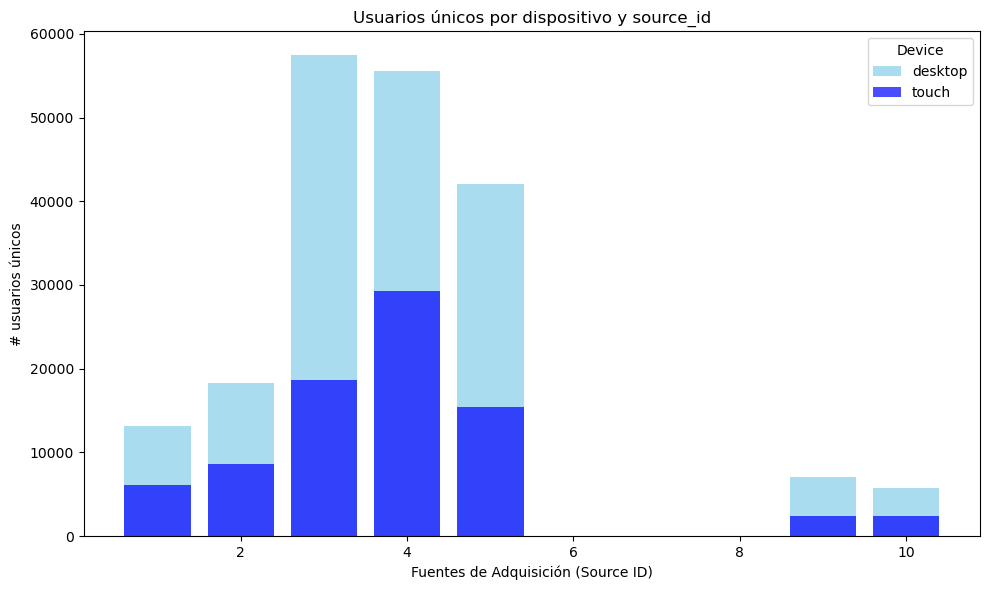

In [78]:
# Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))

# Como tenemos un indice multinivel utilizamos index y luego get_level_values
devices = total_ds.index.get_level_values('device').unique()

# Configurar colores para cada dispositivo
colors = {'desktop': 'skyblue', 'touch': 'blue'}

# Itera sobre cada dispositivo en la lista devices
for device in devices:
    # Crea una máscara booleana que identifica las filas donde el nivel 'device' coincide con el valor actual de device en el bucle
    subset = total_ds.loc[total_ds.index.get_level_values('device') == device]
    # Obtiene los valores del nivel 'source_id' del índice del subconjunto subset. Estos valores se usan como las posiciones en el eje X para las barras.
    ax.bar(subset.index.get_level_values('source_id'), subset['uid'], label=device, color=colors[device], alpha=0.7)

# Etiquetas y título
ax.set_xlabel('Fuentes de Adquisición (Source ID)')
ax.set_ylabel('# usuarios únicos')
ax.set_title('Usuarios únicos por dispositivo y source_id')
ax.legend(title='Device')

# Mostrar gráfico
plt.tight_layout()
plt.show()

### NOTAS
* En general, el número de usuarios es mayor para desktops que para dispositivos touch
* Para dispositivos desktop, la fuente de adquisición con más usuarios es la 3. La que menos usuarios tiene es la 10.
* Para dispositivos touch, la fuente con más usuarios es la 4. La que menos usuarios tiene es la 10.
* Hay una relación visible entre la fuente 3, que era la que tenía el CAC más alto y presentaba el mejor ROMI, y es que es la fuente con más usuarios.
* Las fuentes 6 y 7 tienen menos de 100 usuarios, tanto en desktop como en touch. Se debe evaluar si vale la pena mantenerlas vigentes.
* La fuente número 8 no figura ni en desktop ni en touch. Se debe revisar la razón por la que los usuarios no la están utilizando.

## Dinero gastado por dispositivos y fuente de adquisición

In [82]:
#Filtrar tabla en clean_visits
visits_ds = clean_visits[['source_id', 'device']]

# Filtrar tabla en costs_date
costs_ds =  costs_dates[['source_id','costs']]
visits_costs_ds = pd.merge(visits_ds,costs_ds, on='source_id',how='left')
display(visits_costs_ds)

,source_id,device,costs
0,4,touch,76.74
1,4,touch,59.21
2,4,touch,59.39
3,4,touch,161.97
4,4,touch,44.65
...,...,...,...
130513896,2,touch,113.35
130513897,2,touch,82.67
130513898,2,touch,105.75
130513899,2,touch,119.26


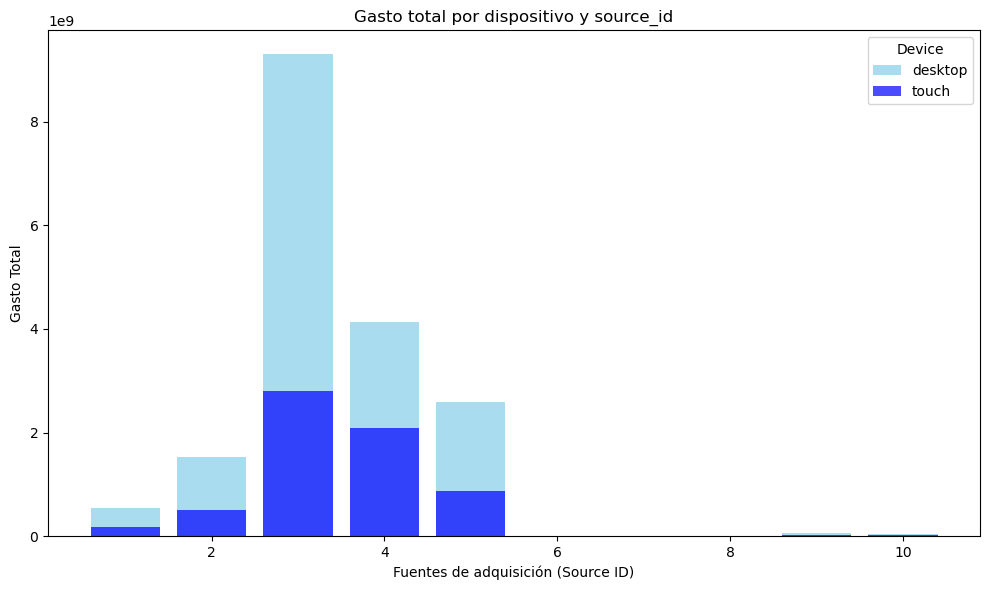

In [80]:
#Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupar por dispositivo y fuente, y luego sumar los costos
grouped_data = visits_costs_ds.groupby(['device', 'source_id'])['costs'].sum().reset_index()

# Configurar colores para cada dispositivo
colors = {'desktop': 'skyblue', 'touch': 'blue'}

# Iterar sobre cada dispositivo en la lista devices
for device in grouped_data['device'].unique():
    subset = grouped_data[grouped_data['device'] == device]
    ax.bar(subset['source_id'], subset['costs'], label=device, color=colors[device], alpha=0.7)

# Etiquetas y título
ax.set_xlabel('Fuentes de adquisición (Source ID)')
ax.set_ylabel('Gasto Total')
ax.set_title('Gasto total por dispositivo y source_id')
ax.legend(title='Device')

# Mostrar gráfico
plt.tight_layout()
plt.show()

### NOTAS
* La fuente con más gasto tanto en desktop como en touch es la 3. Corresponde a la fuente con el mayor ROMI.
* Las fuentes con el peor ROMI (9 y 10) se hacen notar en esta gráfica por su pobre gasto total.
* Hay una correspondencia en las fuentes más relevantes (de 1 a 5), pero en general existe un mayor gasto en desktop.
* Las fuentes 6, 7 y 8 no tienen ninguna relevancia en este análisis, comparados contra el resto.

# CONCLUSIONES

* El análisis de los datos de usuarios revela un promedio de 1 sesión por día, con una duración usual (moda) de 60 segundos. Hay que revisar con el equipo de desarrollo el por qué de este número en particular.
* EL análisis de conversión muestra que la mayoría de usuarios realizan una compra en las primeras 24 horas después de su primer visita. Sin embargo, el análisis de pedidos a lo largo del tiempo y la disminución del LTV indican que hay que mejorar la estrategia de retención de clientes.
* El ROMI negativo encontrado en todas las fuentes de marketing indica que el negocio está perdiendo dinero. Las fuentes 6, 7 y 8 pueden incluso ser eliminadas y dirigir esos recursos a fuentes como la 3, que es la que muestra un mejor ROMI aún siendo la más costosa.  
* Las fuentes 9 y 10 son las más económicas, sin embargo tienen el ROMI más pobre. Puede evaluarse también eliminarlas y enfocarse en el resto.
* El mayor gasto y número de usuarios únicos viene de dispositivos desktop. Conviene analizar el por qué. Puede deberse a que la plataforma en dispositivos touch no sea intuitiva, no se muestre correctamente, o presente problemas en el proceso de compra.